## Water Quality Prediction

In [195]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [102]:
full_data=pd.read_csv('waterquality.csv')
full_data.head()

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0


In [103]:
print(full_data.columns)


Index(['STATION CODE', 'LOCATIONS', 'STATE', 'TEMP', 'DO', 'pH',
       'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM',
       'TOTAL_COLIFORM'],
      dtype='object')


### Data columns and their respective meaning 
<br> **1. 'STATION CODE'**- monitoring stations encoded with a unique code
<br> **2. 'LOCATIONS'**
<br> **3. 'STATE'**
<br> **4. 'TEMP'**
<br> **5. 'DO'**
<br> **6. 'pH'**
<br> **7. 'CONDUCTIVITY'**
<br> **8. 'BOD'**
<br> **9. 'NITRATE_N_NITRITE_N'**
<br> **10. 'FECAL_COLIFORM'**
<br> **11. 'TOTAL_COLIFORM'**

In [104]:
full_data.describe().T

,count,mean,std,min,25%,50%,75%,max
STATION CODE,534.0,2052.516854,7.552179e+02,11.0,1363.500,2159.5,2682.750,3330.0
TEMP,529.0,25.241399,3.448013e+00,10.5,23.300,25.5,27.600,33.8
DO,532.0,6.389812,1.622862e+00,0.0,5.575,6.7,7.425,16.3
pH,534.0,7.798127,6.499504e-01,6.3,7.500,7.9,8.100,14.7
CONDUCTIVITY,504.0,684.976190,1.769330e+03,39.0,269.750,377.5,578.500,24062.0
BOD,528.0,5.339773,8.500504e+00,0.2,1.600,2.7,5.100,75.6
NITRATE_N_NITRITE_N,532.0,1.378571,2.803948e+00,0.0,0.100,0.6,1.700,45.5
FECAL_COLIFORM,452.0,7384.170354,3.071406e+04,0.0,21.750,405.0,2132.500,310417.0
TOTAL_COLIFORM,495.0,124396.967677,1.458408e+06,1.0,128.500,1250.0,4919.000,23816667.0


In [105]:
full_data.isnull().sum()

STATION CODE            0
LOCATIONS               0
STATE                   0
TEMP                    5
DO                      2
pH                      0
CONDUCTIVITY           30
BOD                     6
NITRATE_N_NITRITE_N     2
FECAL_COLIFORM         82
TOTAL_COLIFORM         39
dtype: int64

In [106]:
full_data.dtypes

STATION CODE             int64
LOCATIONS               object
STATE                   object
TEMP                   float64
DO                     float64
pH                     float64
CONDUCTIVITY           float64
BOD                    float64
NITRATE_N_NITRITE_N    float64
FECAL_COLIFORM         float64
TOTAL_COLIFORM         float64
dtype: object

### Data Exploration & Preprocessing

In [107]:
object_cols = [col for col in list(full_data.columns) if full_data[col].dtype == "object"]
print(object_cols)

['LOCATIONS', 'STATE']


In [108]:
full_data.drop(labels=object_cols,axis=1, inplace= True)

In [109]:
from sklearn.impute import SimpleImputer

# Fill in the lines below: imputation
imput=SimpleImputer(strategy='mean')
data=pd.DataFrame(imput.fit_transform(full_data))
data.columns=full_data.columns

In [110]:
data.isnull().sum()

STATION CODE           0
TEMP                   0
DO                     0
pH                     0
CONDUCTIVITY           0
BOD                    0
NITRATE_N_NITRITE_N    0
FECAL_COLIFORM         0
TOTAL_COLIFORM         0
dtype: int64

In [111]:
column=data.columns

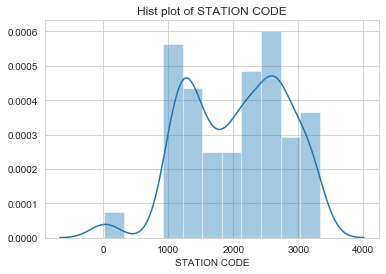

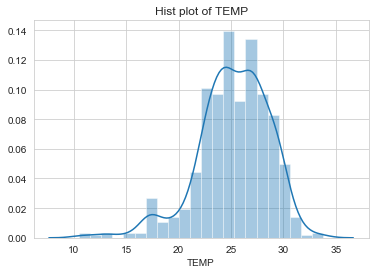

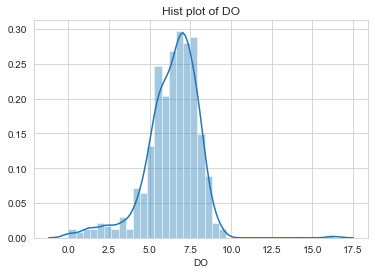

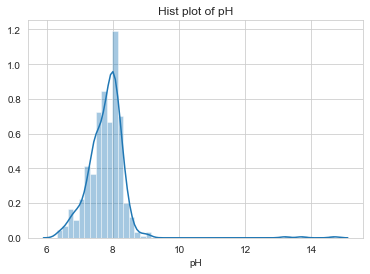

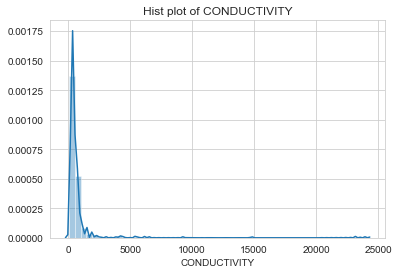

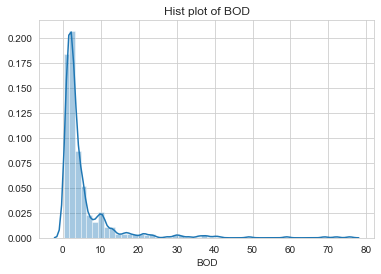

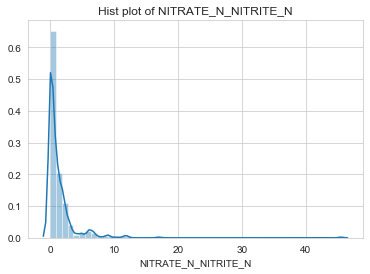

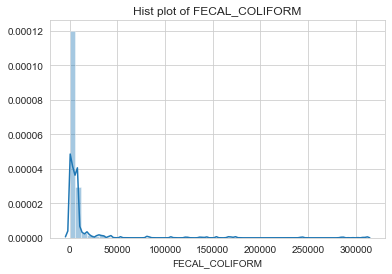

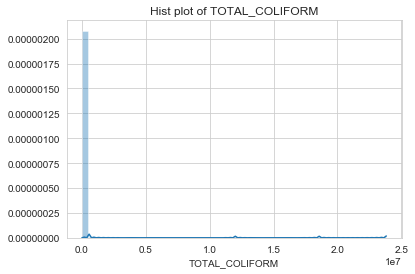

In [112]:
def plot_hist(column):
    for col in column:
        sns.set_style('whitegrid')
        sns.distplot(data[col])
        plt.title(f'Hist plot of {col}')
        #plt.grid()
        plt.show()
plot_hist(column)

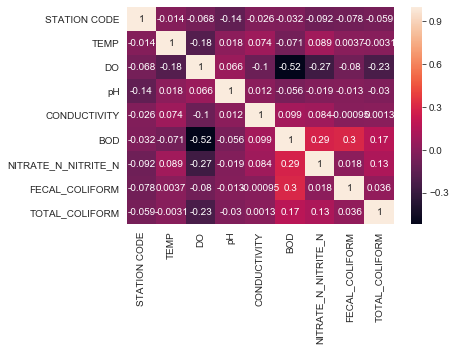

In [113]:

sns.heatmap(data.corr(),annot=True)

#### the explanation to the calculations can be found at <a href="https://www.researchgate.net/post/How_to_calculate_water_quality_Index#view=59bfede596b7e48f392123b7" target="_blank">this link</a>.



In [114]:
data['ndo']=data.DO.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))
data['npH']=data.pH.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))
data['nco']=data.FECAL_COLIFORM .apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))
data['nbdo']=data.BOD.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))
data['nec']=data.CONDUCTIVITY.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))
data['nna']=data.NITRATE_N_NITRITE_N.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))


In [115]:
data.head()

,STATION CODE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,ndo,npH,nco,nbdo,nec,nna
0,1312.0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0,100,100,100,80,0,100
1,2177.0,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0,100,100,60,80,40,100
2,2182.0,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0,80,100,60,80,0,100
3,2179.0,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0,80,100,60,80,0,100
4,2183.0,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0,80,100,80,80,40,100


In [116]:
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['WQI']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 

In [117]:
data.head()

,STATION CODE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,ndo,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,WQI
0,1312.0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0,100,...,80,0,100,16.5,28.10,18.72,0.00,2.8,28.10,94.22
1,2177.0,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0,100,...,80,40,100,16.5,28.10,18.72,0.36,2.8,16.86,83.34
2,2182.0,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0,80,...,80,0,100,16.5,22.48,18.72,0.00,2.8,16.86,77.36
3,2179.0,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0,80,...,80,0,100,16.5,22.48,18.72,0.00,2.8,16.86,77.36
4,2183.0,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0,80,...,80,40,100,16.5,22.48,18.72,0.36,2.8,22.48,83.34


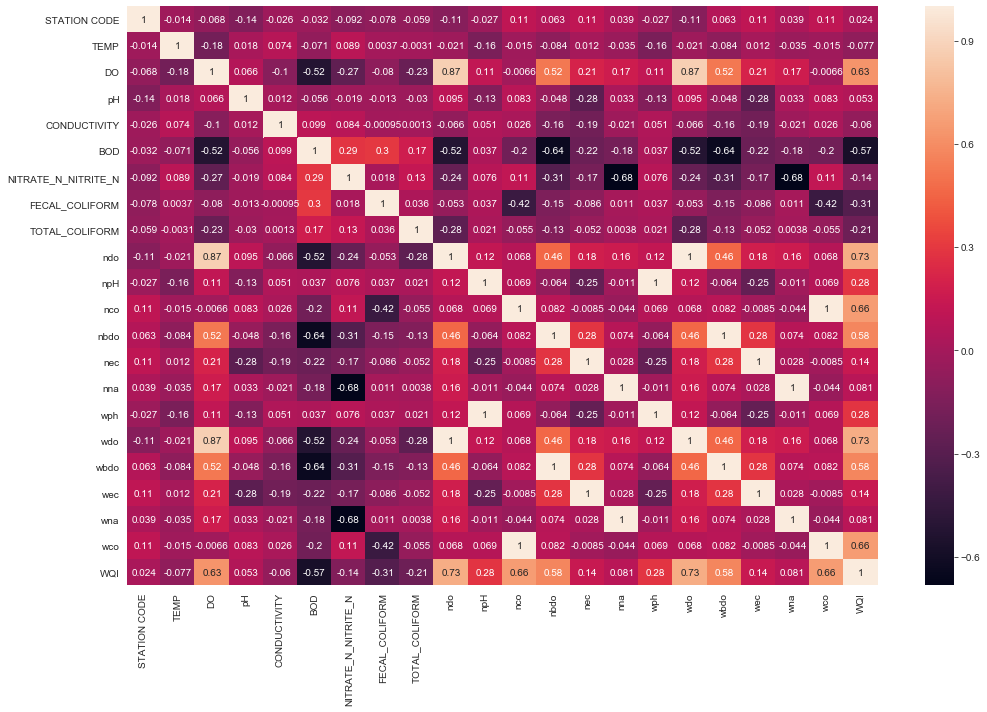

In [120]:
f, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(data.corr(),annot=True)
f.tight_layout()

In [130]:
data['WaterQuality']=data.WQI.apply(lambda x:('Excellent' if (50>=x>=0) else 'Unsuitable') )


In [131]:
print(data['WaterQuality'].value_counts())

Unsuitable    512
Excellent      22
Name: WaterQuality, dtype: int64


In [132]:
data.columns

Index(['STATION CODE', 'TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD',
       'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM', 'ndo', 'npH',
       'nco', 'nbdo', 'nec', 'nna', 'wph', 'wdo', 'wbdo', 'wec', 'wna', 'wco',
       'WQI', 'WaterQuality'],
      dtype='object')

### Model Building

In [161]:
# defining dataset
features=['STATION CODE', 'TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD',
       'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM', 'ndo', 'npH',
       'nco', 'nbdo', 'nec', 'nna', 'wph', 'wdo', 'wbdo', 'wec', 'wna', 'wco',
       'WQI']

data ['WaterQuality']= data ['WaterQuality'].map({'Unsuitable':0,'Excellent':1})
full_train_data=data.copy()
X=full_train_data[features]
y=full_train_data['WaterQuality']


In [244]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=32,shuffle=True, stratify=y)

In [245]:
print(x_train.shape,x_test.shape)

(427, 22) (107, 22)


In [246]:
#specify model
model=RandomForestClassifier( 
    n_estimators=100,
    criterion='gini',
    max_depth=8,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1, random_state=42)

In [247]:
from sklearn.ensemble import AdaBoostClassifier
models=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100,
    learning_rate=0.1,
    algorithm='SAMME.R',
    random_state=None,)

In [248]:
pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])

In [249]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=8, n_jobs=-1,
                                        random_state=42))])

In [250]:
predictions=pipeline.predict(x_test)

In [251]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

### Model Accuracy

In [252]:
accuracy=pipeline.score(x_test,y_test)
print(f'The accuracy of the model is {accuracy}')

The accuracy of the model is 1.0


In [253]:
confusion_matrix(y_test, predictions)

array([[103,   0],
       [  0,   4]], dtype=int64)

In [254]:
score=cross_val_score(model, X,y,scoring="neg_mean_squared_error", cv=10,verbose=1,n_jobs=-1)
print('cross validation score is ',np.sqrt(abs(score)))
for i, scores in enumerate(score):
     print(f"Accuracy for the fold no. {i} on the test set: {scores}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


cross validation score is  [0.         0.19245009 0.         0.         0.         0.
 0.         0.         0.         0.        ]
Accuracy for the fold no. 0 on the test set: -0.0
Accuracy for the fold no. 1 on the test set: -0.037037037037037035
Accuracy for the fold no. 2 on the test set: -0.0
Accuracy for the fold no. 3 on the test set: -0.0
Accuracy for the fold no. 4 on the test set: -0.0
Accuracy for the fold no. 5 on the test set: -0.0
Accuracy for the fold no. 6 on the test set: -0.0
Accuracy for the fold no. 7 on the test set: -0.0
Accuracy for the fold no. 8 on the test set: -0.0
Accuracy for the fold no. 9 on the test set: -0.0


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished
